<a href="https://colab.research.google.com/github/navilaufm/ML_LR_rainfall_MGGT/blob/main/Norman_Avila_ML_LR_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://github.com/navilaufm/ML_LR_rainfall_MGGT/raw/main/metar_data.csv')
##noaa codes por precipitation https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM

In [3]:
data.head()

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,dew_10am,hum_10am,wnd_10am,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,11.0,58.0,360.0,N,5.1,1026.1,22000.0,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,13.0,68.0,360.0,N,7.2,1027.1,22000.0,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,10.0,56.0,360.0,N,9.3,1028.1,22000.0,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,9.0,50.0,360.0,N,7.2,1029.1,22000.0,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,10.0,59.0,360.0,N,5.1,1027.1,22000.0,0,0,0


In [4]:
## create a date field to get month, day, year
data['day_date'] = pd.to_datetime(data['day_date'])
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,dew_10am,hum_10am,wnd_10am,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,11.0,58.0,360.0,N,5.1,1026.1,22000.0,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,13.0,68.0,360.0,N,7.2,1027.1,22000.0,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,10.0,56.0,360.0,N,9.3,1028.1,22000.0,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,9.0,50.0,360.0,N,7.2,1029.1,22000.0,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,10.0,59.0,360.0,N,5.1,1027.1,22000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,...,11.0,69.0,40.0,N,6.2,1027.0,99999.0,0,0,0
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,...,10.0,63.0,20.0,N,5.1,1028.0,99999.0,0,0,1
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,...,11.0,69.0,360.0,N,4.1,1028.0,99999.0,0,0,0
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,...,13.0,65.0,-99.0,CALM,2.1,1025.0,99999.0,0,0,0


In [5]:
data['year'] = data['day_date'].dt.year
data['month'] = data['day_date'].dt.month
data['day'] = data['day_date'].dt.day
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday,year,month,day
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,N,5.1,1026.1,22000.0,0,0,0,2001,1,1
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,N,7.2,1027.1,22000.0,0,0,0,2001,1,2
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,N,9.3,1028.1,22000.0,0,0,0,2001,1,3
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,N,7.2,1029.1,22000.0,0,0,0,2001,1,4
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,N,5.1,1027.1,22000.0,0,0,0,2001,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,...,N,6.2,1027.0,99999.0,0,0,0,2020,12,27
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,...,N,5.1,1028.0,99999.0,0,0,1,2020,12,28
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,...,N,4.1,1028.0,99999.0,0,0,0,2020,12,29
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,...,CALM,2.1,1025.0,99999.0,0,0,0,2020,12,30


In [6]:
# create dummy variables of wind direction feactures features
data = pd.get_dummies(data, columns=['wdd_9am'])
data = pd.get_dummies(data, columns=['wdd_10am'])
data.T

,0,1,2,3,4,5,6,7,8,9,...,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779
dia,2001-01-01 00:00:00.000,2001-01-02 00:00:00.000,2001-01-03 00:00:00.000,2001-01-04 00:00:00.000,2001-01-05 00:00:00.000,2001-01-06 00:00:00.000,2001-01-07 00:00:00.000,2001-01-08 00:00:00.000,2001-01-09 00:00:00.000,2001-01-10 00:00:00.000,...,2020-12-22 00:00:00.000,2020-12-23 00:00:00.000,2020-12-24 00:00:00.000,2020-12-25 00:00:00.000,2020-12-26 00:00:00.000,2020-12-27 00:00:00.000,2020-12-28 00:00:00.000,2020-12-29 00:00:00.000,2020-12-30 00:00:00.000,2020-12-31 00:00:00.000
day_date,2001-01-01 00:00:00,2001-01-02 00:00:00,2001-01-03 00:00:00,2001-01-04 00:00:00,2001-01-05 00:00:00,2001-01-06 00:00:00,2001-01-07 00:00:00,2001-01-08 00:00:00,2001-01-09 00:00:00,2001-01-10 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
tmp_9am,17.0,18.2,18.0,15.2,15.0,14.8,16.8,17.8,16.0,16.6,...,18.0,19.0,19.0,19.0,14.0,14.0,14.0,16.0,17.0,19.0
dew_9am,10.0,13.2,10.5,9.2,10.0,11.2,11.0,13.2,11.0,9.3,...,14.0,13.0,14.0,11.0,9.0,11.0,10.0,10.0,13.0,15.0
hum_9am,59,73,58,61,67,76,65,74,69,56,...,78,68,74,58,64,79,71,63,76,79
wnd_9am,360,20,360,360,360,30,180,360,360,360,...,360,360,180,30,360,40,30,360,360,180
spd_9am,6.2,9.3,11.3,12.9,9.3,5.1,2.1,2.1,9.3,7.2,...,7.2,7.2,2.1,14.4,8.2,6.2,7.2,8.2,2.1,3.1
alt_9am,1026.1,1027.1,1028.1,1029.1,1027.1,1025.1,1023.0,1024.0,1026.1,1027.1,...,1028.0,1028.0,1027.0,1028.0,1028.0,1027.0,1028.0,1028.0,1025.0,1024.0
cig_9am,6000,22000,22000,22000,22000,22000,22000,22000,22000,22000,...,99999,99999,99999,99999,99999,366,549,99999,99999,2438
tmp_10am,19.0,19.0,18.0,18.0,17.0,17.0,19.0,20.0,18.0,18.0,...,20.0,21.0,22.0,19.0,16.0,16.0,16.0,16.0,20.0,19.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dia            6780 non-null   object        
 1   day_date       6780 non-null   datetime64[ns]
 2   tmp_9am        6780 non-null   float64       
 3   dew_9am        6780 non-null   float64       
 4   hum_9am        6780 non-null   int64         
 5   wnd_9am        6780 non-null   int64         
 6   spd_9am        6779 non-null   float64       
 7   alt_9am        6752 non-null   float64       
 8   cig_9am        6780 non-null   int64         
 9   tmp_10am       6549 non-null   float64       
 10  dew_10am       6545 non-null   float64       
 11  hum_10am       6541 non-null   float64       
 12  wnd_10am       6606 non-null   float64       
 13  spd_10am       6379 non-null   float64       
 14  alt_10am       6535 non-null   float64       
 15  cig_10am       6606 n

In [8]:
data['cig_9am'].unique() ##todo check if this values can be dummied.

array([ 6000, 22000,   420,   510,   180,   360,  2100,   480,   390,
         450,   600,  4500,  2400,   540, 10500,  2700,  3000,   900,
         120,   240,   750,   660, 99999,   300,  3600,   720,  1800,
          90,    60,  6096,   427,   396,   305,   488,  2438,  3048,
         457,   549,  2743,   610,   518,   366,  2134,  1829,   671,
          61,   183,  1981,   122,  3658,   244])

In [9]:
#data = pd.get_dummies(data, columns=['cig_9am'])
#data

## no relevant variable and correlation after dummies. so reverted

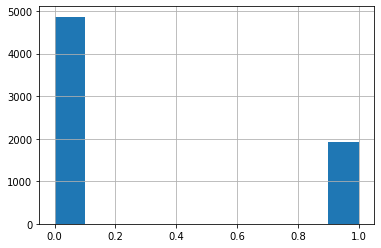

In [10]:
data["pcp"].hist() ##this is the value wanted to predict if will rain in afternoon

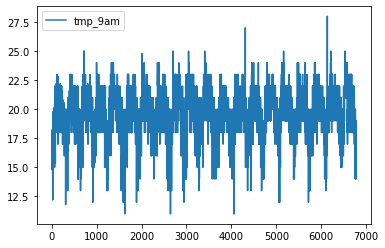

In [11]:
data[['tmp_9am']].plot()

In [12]:
data.columns

Index(['dia', 'day_date', 'tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
       'spd_9am', 'alt_9am', 'cig_9am', 'tmp_10am', 'dew_10am', 'hum_10am',
       'wnd_10am', 'spd_10am', 'alt_10am', 'cig_10am', 'pcp_hrs', 'pcp',
       'pcp_yesterday', 'year', 'month', 'day', 'wdd_9am_CALM', 'wdd_9am_E',
       'wdd_9am_N', 'wdd_9am_S', 'wdd_9am_W', 'wdd_10am_CALM', 'wdd_10am_E',
       'wdd_10am_N', 'wdd_10am_S', 'wdd_10am_W'],
      dtype='object')

In [13]:
import seaborn as sns

In [14]:
##sns.pairplot(data[
##        ['tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
##       'spd_9am', 'alt_9am', 'cig_9am', 'pcp','pcp_yesterday']        
##])

In [15]:
data.pcp.isnull().sum() ##no null values

0

In [16]:

#data=data.drop(data[data.hum_10am.isnull()].index)  ##cleanup
#data[data.hum_10am.isnull()==False]

data= data[data.hum_9am.isnull()==False]
data= data[data.hum_10am.isnull()==False]
data= data[data.alt_9am.isnull()==False]
data= data[data.alt_10am.isnull()==False]
data= data[data.spd_9am.isnull()==False]
data= data[data.spd_10am.isnull()==False]
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,6.2,1026.1,6000,19.0,...,0,0,1,0,0,0,0,1,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,9.3,1027.1,22000,19.0,...,0,0,1,0,0,0,0,1,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,11.3,1028.1,22000,18.0,...,0,0,1,0,0,0,0,1,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,12.9,1029.1,22000,18.0,...,0,0,1,0,0,0,0,1,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,9.3,1027.1,22000,17.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,6.2,1027.0,366,16.0,...,0,0,1,0,0,0,0,1,0,0
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,7.2,1028.0,549,16.0,...,0,0,1,0,0,0,0,1,0,0
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,8.2,1028.0,99999,16.0,...,0,0,1,0,0,0,0,1,0,0
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,2.1,1025.0,99999,20.0,...,0,0,1,0,0,1,0,0,0,0


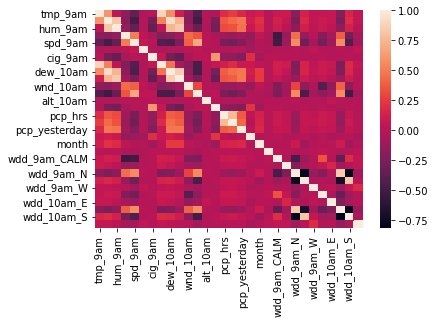

In [17]:
sns.heatmap(data.corr())

In [18]:
data_corr = data.corr()
data_corr

,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,dew_10am,hum_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W
tmp_9am,1.000000,0.597908,0.039722,-0.168097,-0.345001,-0.022346,0.004755,0.890675,0.566511,0.119284,...,0.081155,0.089621,-0.191277,0.132283,0.043732,0.049573,0.060053,-0.204098,0.161213,0.047345
dew_9am,0.597908,1.000000,0.818762,-0.199035,-0.475398,-0.021305,-0.269960,0.520614,0.922867,0.735668,...,0.130866,0.065143,-0.246736,0.171610,0.049508,0.090687,0.059199,-0.246277,0.196784,0.043023
hum_9am,0.039722,0.818762,1.000000,-0.128296,-0.347316,-0.011486,-0.335489,0.023372,0.744487,0.834018,...,0.104588,0.015298,-0.173811,0.124037,0.029449,0.078395,0.028922,-0.164005,0.134707,0.020281
wnd_9am,-0.168097,-0.199035,-0.128296,1.000000,0.499257,0.028778,-0.050645,-0.217859,-0.176864,-0.073136,...,-0.528749,-0.129170,0.446666,-0.133136,0.009086,-0.206987,-0.068067,0.388667,-0.283218,-0.047336
spd_9am,-0.345001,-0.475398,-0.347316,0.499257,1.000000,0.063028,0.004127,-0.417572,-0.439030,-0.252759,...,-0.496234,-0.109920,0.566207,-0.284219,-0.077864,-0.282072,-0.104052,0.573266,-0.419906,-0.084734
alt_9am,-0.022346,-0.021305,-0.011486,0.028778,0.063028,1.000000,-0.010595,-0.023941,-0.018353,-0.006968,...,-0.000809,-0.006651,0.008269,-0.014798,0.038308,-0.010572,-0.007586,0.011512,-0.010206,0.038326
cig_9am,0.004755,-0.269960,-0.335489,-0.050645,0.004127,-0.010595,1.000000,0.070760,-0.278871,-0.354090,...,0.014912,0.009807,-0.001583,-0.009917,-0.006960,0.013619,-0.009862,-0.010473,0.001918,-0.007555
tmp_10am,0.890675,0.520614,0.023372,-0.217859,-0.417572,-0.023941,0.070760,1.000000,0.462619,-0.064607,...,0.122676,0.096760,-0.229794,0.148818,0.038044,0.090279,0.076174,-0.251249,0.178258,0.051170
dew_10am,0.566511,0.922867,0.744487,-0.176864,-0.439030,-0.018353,-0.278871,0.462619,1.000000,0.849051,...,0.115456,0.049593,-0.218753,0.155023,0.045088,0.087752,0.045959,-0.222406,0.175094,0.034210
hum_10am,0.119284,0.735668,0.834018,-0.073136,-0.252759,-0.006968,-0.354090,-0.064607,0.849051,1.000000,...,0.056942,-0.000607,-0.117966,0.095538,0.028161,0.047519,0.005957,-0.108891,0.099541,0.010756


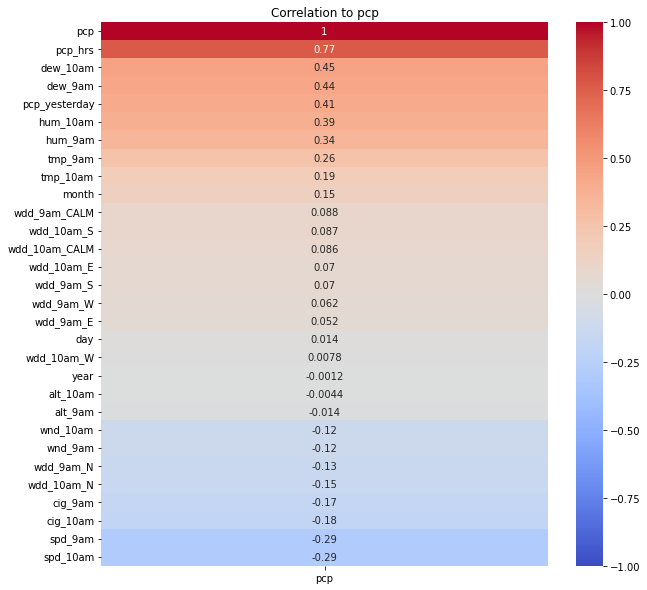

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data_corr[['pcp']].sort_values(by=['pcp'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True).set(title='Correlation to pcp');

In [20]:
data_corr[['pcp']].sort_values(by=['pcp'],ascending=False)

,pcp
pcp,1.000000
pcp_hrs,0.768175
dew_10am,0.450448
dew_9am,0.435098
pcp_yesterday,0.411585
hum_10am,0.388228
hum_9am,0.344160
tmp_9am,0.259782
tmp_10am,0.186548
month,0.150475


In [21]:
import numpy as np

## Data to predict

In [22]:
#removing pcp and storing in variable y this will not change..
y = data.pop('pcp')
y

0       0
1       0
2       0
3       0
4       0
       ..
6775    0
6776    0
6777    0
6778    0
6779    1
Name: pcp, Length: 6126, dtype: int64

In [23]:
data_corr[['pcp']].sort_values(by=['pcp'],ascending=False).index


Index(['pcp', 'pcp_hrs', 'dew_10am', 'dew_9am', 'pcp_yesterday', 'hum_10am',
       'hum_9am', 'tmp_9am', 'tmp_10am', 'month', 'wdd_9am_CALM', 'wdd_10am_S',
       'wdd_10am_CALM', 'wdd_10am_E', 'wdd_9am_S', 'wdd_9am_W', 'wdd_9am_E',
       'day', 'wdd_10am_W', 'year', 'alt_10am', 'alt_9am', 'wnd_10am',
       'wnd_9am', 'wdd_9am_N', 'wdd_10am_N', 'cig_9am', 'cig_10am', 'spd_9am',
       'spd_10am'],
      dtype='object')

In [24]:
#X = data[['tmp_9am','dew_9am', 'tmp_10am','dew_10am','month', 'wdd_9am_CALM','pcp_yesterday']] ##features with most correlation

X = data[['tmp_10am','hum_10am','month', 'wdd_9am_CALM','pcp_yesterday']] ##features with most correlation         
#question 
X

,tmp_10am,hum_10am,month,wdd_9am_CALM,pcp_yesterday
0,19.0,58.0,1,0,0
1,19.0,68.0,1,0,0
2,18.0,56.0,1,0,0
3,18.0,50.0,1,0,0
4,17.0,59.0,1,0,0
...,...,...,...,...,...
6775,16.0,69.0,12,0,0
6776,16.0,63.0,12,0,1
6777,16.0,69.0,12,0,0
6778,20.0,65.0,12,0,0


In [25]:
#ML Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,tmp_10am,hum_10am,month,wdd_9am_CALM,pcp_yesterday
5411,20.0,55.0,2,0,0
3395,24.0,50.0,4,0,0
3359,18.0,67.0,3,0,0
5362,20.0,75.0,12,0,1
5688,22.0,64.0,11,0,0
...,...,...,...,...,...
6556,25.0,52.0,5,0,0
2154,21.0,81.0,9,0,1
6002,23.0,65.0,10,0,1
3221,21.0,67.0,10,0,0


In [27]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]
predictionsb = clf.predict(X_test)
print(predictions)
print(predictionsb)

[0.14256004 0.10874851 0.19395537 ... 0.54767    0.08534164 0.1933752 ]
[0 0 0 ... 1 0 0]


In [28]:
print('ConfMatrix\n', confusion_matrix(y_test,predictionsb))
print('\n\nAccuracy:',accuracy_score(y_test,predictionsb))
print('\n\nClassification Report\n\n',classification_report(y_test,predictionsb))



ConfMatrix
 [[931 173]
 [189 239]]


Accuracy: 0.7637075718015666


Classification Report

               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1104
           1       0.58      0.56      0.57       428

    accuracy                           0.76      1532
   macro avg       0.71      0.70      0.70      1532
weighted avg       0.76      0.76      0.76      1532



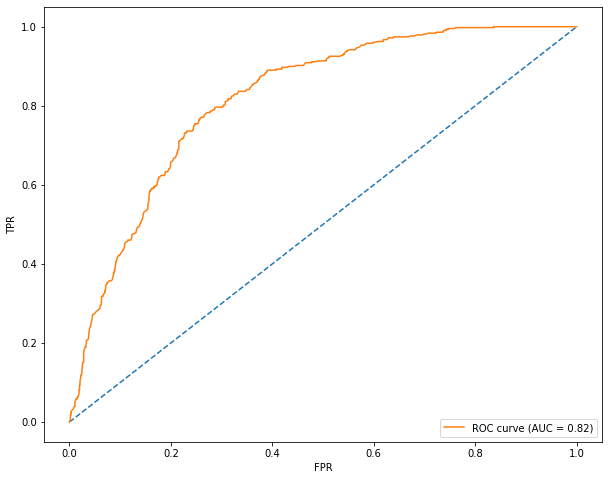

In [29]:
## evaluating Model
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

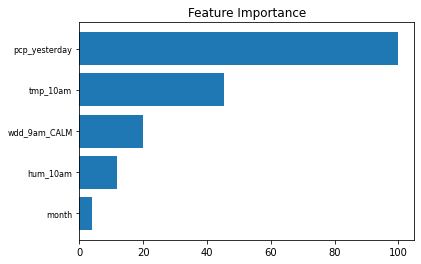

In [30]:
## feature importance

## TOP Correlations. - see above
#-------------------------------#
#dew_9am	0.436143
#pcp_yesterday	0.413329
#hum_9am	0.347378
#tmp_9am	0.260427
#month	0.147885

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

In [31]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pcp   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                              903.1
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        19:30:14   Log-Likelihood:                         -3160.4
No. Observations:                6126   AIC:                                      6331.
Df Residuals:                    6121   BIC:                                      6364.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [32]:
##prediction testing

## selection: 'tmp_9am', 'dew_9am', 'hum_9am', 'pcp_yesterday', 'month','wdd_9am_CALM'

##with data of 10am also combined with 10am rain
## 'tmp_9am','dew_9am', 'tmp_10am','dew_10am', 'month', 'wdd_9am_CALM','pcp_yesterday'
prediction = results.get_prediction([23.3,23.3*.65,5,0,1])
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.246961,0.029492,0.189146,0.304775,-0.550068,1.043989


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77197ca90>]],
      dtype=object)

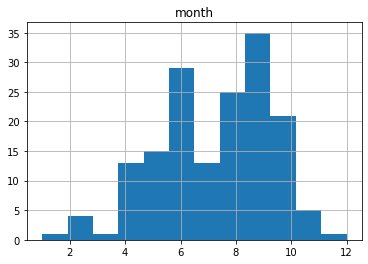

In [33]:
data[(data['wdd_9am_CALM']==1) & (data['pcp_hrs']>0)].hist('month',bins=12) ##when was wind calm and rained

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77199d590>]],
      dtype=object)

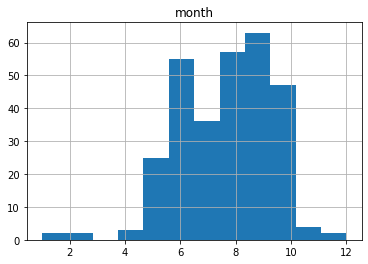

In [34]:
data[(data['pcp_hrs']>5)].hist('month',bins=12) ##rainy afternoon / night

In [57]:
def make_prediction(predictors,data,inputs=[]):
  X = data[predictors]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  ##model
  clf = LogisticRegression(penalty='l2',max_iter=200).fit(X_train, y_train)

  # predict probabilities
  predictions = clf.predict_proba(X_test)[:, 1]
  predictionsb = clf.predict(X_test)
  #print(predictions)
  #print(predictionsb)
  accuracy = accuracy_score(y_test,predictionsb)
  print('ConfMatrix\n', confusion_matrix(y_test,predictionsb))
  print('\n\nAccuracy:',accuracy)
  print('\n\nClassification Report\n\n',classification_report(y_test,predictionsb))

  
  # calculate scores
  auc = roc_auc_score(y_test, predictions)

  # calculate roc curves
  fpr, tpr, _ = roc_curve(y_test, predictions)

  plt.figure(figsize=(10, 8))
  # plot horizontal line 
  plt.plot([0, 1], [0, 1], linestyle='--')
  # plot the roc curve for the model
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  # axis labels
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  # show the legend
  plt.legend(loc='lower right')
  # show the plot
  plt.show()

  ## feature importance

  ## TOP Correlations. - see above
  #-------------------------------#
  #dew_9am	0.436143
  #pcp_yesterday	0.413329
  #hum_9am	0.347378
  #tmp_9am	0.260427
  #month	0.147885

  feature_importance = abs(clf.coef_[0])
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5

  featfig = plt.figure()
  featax = featfig.add_subplot(1, 1, 1)
  featax.barh(pos, feature_importance[sorted_idx], align='center')
  featax.set_yticks(pos)
  featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

  plt.title('Feature Importance')
  plt.show()

  model = sm.OLS(y, X)
  results = model.fit()
  print(results.summary())
  if len(inputs)>0:
    st1 =" "
    prediction = results.get_prediction(inputs)
    print('\n\n====================================================\nPrediction for: '+st1.join([str(x) for x in inputs])+'\n\n',prediction.summary_frame())
    print('\n\nAccuracy:',accuracy)
    print('\n\nAUC:',auc)


ConfMatrix
 [[946 153]
 [192 241]]


Accuracy: 0.7748041775456919


Classification Report

               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1099
           1       0.61      0.56      0.58       433

    accuracy                           0.77      1532
   macro avg       0.72      0.71      0.71      1532
weighted avg       0.77      0.77      0.77      1532



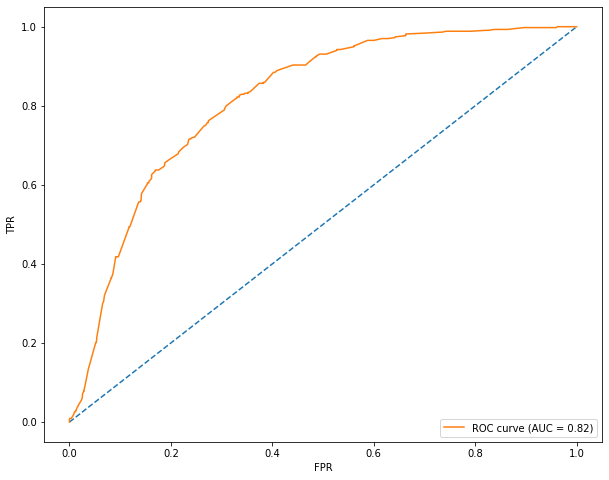

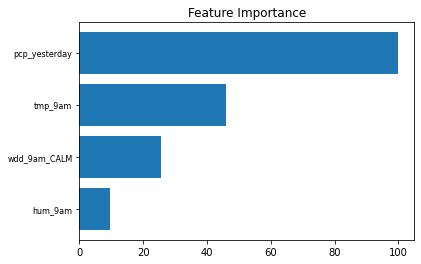

                                 OLS Regression Results                                
Dep. Variable:                    pcp   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.417
Method:                 Least Squares   F-statistic:                              1098.
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        19:51:33   Log-Likelihood:                         -3196.3
No. Observations:                6126   AIC:                                      6401.
Df Residuals:                    6122   BIC:                                      6428.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [68]:
make_prediction(['tmp_9am','hum_9am', 'wdd_9am_CALM','pcp_yesterday'],data,[22,68,1,1])

ConfMatrix
 [[940 164]
 [182 246]]


Accuracy: 0.7741514360313316


Classification Report

               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1104
           1       0.60      0.57      0.59       428

    accuracy                           0.77      1532
   macro avg       0.72      0.71      0.72      1532
weighted avg       0.77      0.77      0.77      1532



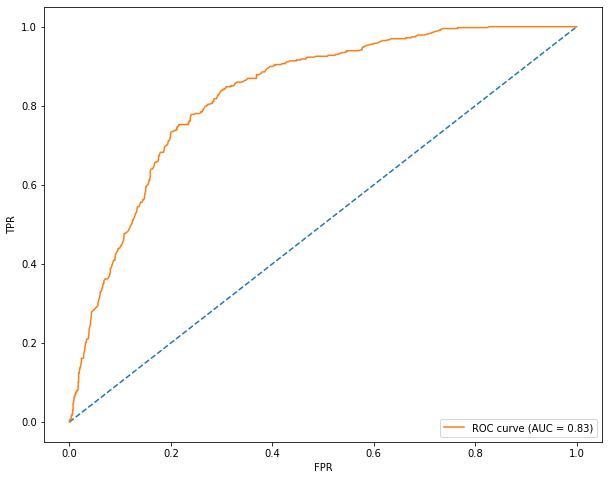

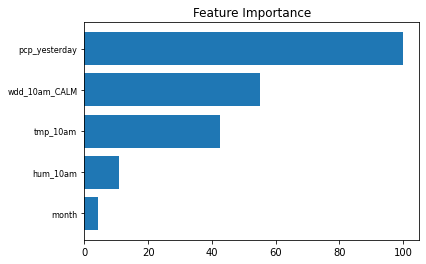

                                 OLS Regression Results                                
Dep. Variable:                    pcp   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                              902.6
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        19:50:16   Log-Likelihood:                         -3161.2
No. Observations:                6126   AIC:                                      6332.
Df Residuals:                    6121   BIC:                                      6366.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [64]:
make_prediction(['tmp_10am','hum_10am','month', 'wdd_10am_CALM','pcp_yesterday'],data,[24,15/24*100,5,1,1])

ConfMatrix
 [[957 131]
 [207 237]]


Accuracy: 0.779373368146214


Classification Report

               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1088
           1       0.64      0.53      0.58       444

    accuracy                           0.78      1532
   macro avg       0.73      0.71      0.72      1532
weighted avg       0.77      0.78      0.77      1532



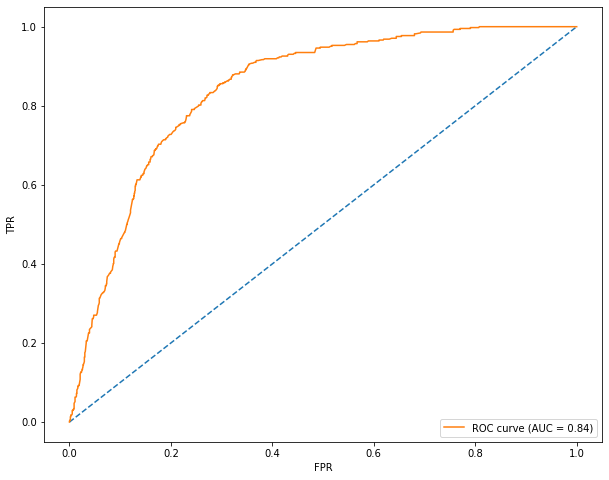

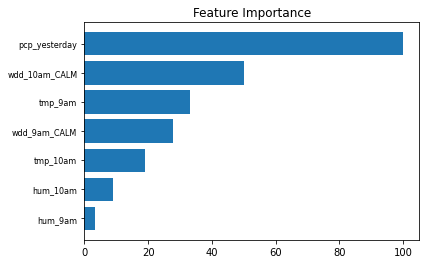

                                 OLS Regression Results                                
Dep. Variable:                    pcp   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              657.5
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        19:49:16   Log-Likelihood:                         -3135.1
No. Observations:                6126   AIC:                                      6284.
Df Residuals:                    6119   BIC:                                      6331.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [62]:
make_prediction(['tmp_9am','hum_9am','tmp_10am','hum_10am','wdd_9am_CALM','wdd_10am_CALM','pcp_yesterday'],data,[22,15/22*100,24,15/24*100,1,0,1])

In [39]:
data[data.spd_9am.isnull()==True]

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ConfMatrix
 [[998 115]
 [191 228]]


Accuracy: 0.8002610966057441


Classification Report

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1113
           1       0.66      0.54      0.60       419

    accuracy                           0.80      1532
   macro avg       0.75      0.72      0.73      1532
weighted avg       0.79      0.80      0.79      1532



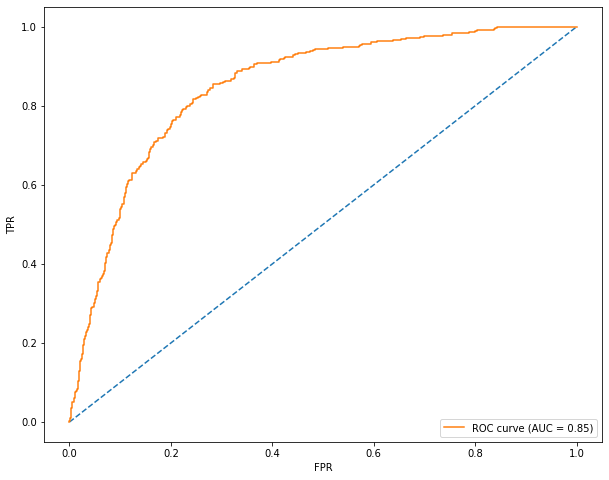

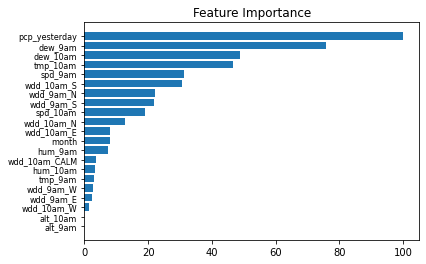

                                 OLS Regression Results                                
Dep. Variable:                    pcp   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              271.8
Date:                Tue, 17 May 2022   Prob (F-statistic):                        0.00
Time:                        19:30:19   Log-Likelihood:                         -2831.0
No. Observations:                6126   AIC:                                      5704.
Df Residuals:                    6105   BIC:                                      5845.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [40]:
make_prediction([ 'tmp_9am', 'dew_9am', 'hum_9am', 'spd_9am', 'alt_9am', 'tmp_10am', 'dew_10am', 'hum_10am', 'spd_10am', 'alt_10am',
                 'pcp_yesterday',  'month', 'wdd_9am_E', 'wdd_9am_N', 'wdd_9am_S',
                 'wdd_9am_W', 'wdd_10am_CALM', 'wdd_10am_E', 'wdd_10am_N', 'wdd_10am_S', 'wdd_10am_W'],data)